In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import requests

In [25]:
# load data
data_session = pd.read_csv('../session_planning_pars_with_loc_v12.csv')

In [26]:
data_session.head(1)

,Unnamed: 0,num_jour,date,discipline,num_session,debut_epreuve,fin_epreuve,lieu_epreuve,nom_epreuve,parsing_epreuve,NOM,Geo Point,SITES OLYMPIQUES PARALYMPIQUES,SPORTS,latitude,longitude
0,1,7,Vendredi 2 Août,Athletisme,ATH02,10:00,13:00,Stade de France,"Décathlon - 100 m, hommes Lancer de marteau - ...","{""content"": [{""epreuve"": ""D\u00e9cathlon"", ""ge...",Stade de France,"48.924388, 2.359871","Site olympique,Site paralympique","Athlétisme,Para athlétisme,Rugby",48.924388,2.359871


In [27]:
# data_session = data_session.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)
data_session = data_session.drop(["Unnamed: 0"], axis=1)

In [28]:
data_session.head(1)

,num_jour,date,discipline,num_session,debut_epreuve,fin_epreuve,lieu_epreuve,nom_epreuve,parsing_epreuve,NOM,Geo Point,SITES OLYMPIQUES PARALYMPIQUES,SPORTS,latitude,longitude
0,7,Vendredi 2 Août,Athletisme,ATH02,10:00,13:00,Stade de France,"Décathlon - 100 m, hommes Lancer de marteau - ...","{""content"": [{""epreuve"": ""D\u00e9cathlon"", ""ge...",Stade de France,"48.924388, 2.359871","Site olympique,Site paralympique","Athlétisme,Para athlétisme,Rugby",48.924388,2.359871


In [29]:
data_session.lieu_epreuve.unique()

array(['Stade de France',
       "Hôtel de Ville (site de départ) - Invalides (site d'arrivée)",
       'Stade nautique de Vaires-sur-Marne - Bassin eaux calmes',
       'Arena Porte de La Chapelle', 'Arena Bercy', 'La Concorde 1',
       'La Concorde', 'Stade BMX de Saint-Quentin-en-Yvelines',
       'Arena Paris Nord', 'Stade Roland-Garros - P.Chatrier',
       'Stade nautique de Vaires-sur-Marne - Bassin eaux vives',
       'Vélodrome National de Saint-Quentin-en-Yvelines',
       'Départ Invalides - Arrivée Pont Alexandre III',
       "Site d'escalade du Bourget", 'Grand Palais', 'Parc des Princes',
       'Golf National', 'Porte de La Chapelle Arena', 'Arena Paris Sud 6',
       'Stade Yves-du-Manoir - Terrain 1',
       'Stade Yves-du-Manoir - Terrain 2', 'Arena Champ-de-Mars',
       'Paris La Défense Arena', 'Centre aquatique',
       'Château de Versailles', 'La Concorde 3', 'La Concorde 4',
       'Stade Roland-Garros - Court Suzanne-Lenglen',
       'Stade Roland-Garros - Co

In [30]:
stade_vers_capacite = {
    'Stade de France': 80000,
    'Stade nautique de Vaires-sur-Marne - Bassin eaux calmes': 14000,
    'Arena Porte de La Chapelle': 9000,
    'Stade BMX de Saint-Quentin-en-Yvelines': 3000,
    'Stade nautique de Vaires-sur-Marne - Bassin eaux vives': 24000,
    'Vélodrome National de Saint-Quentin-en-Yvelines': 6000,
    'Grand Palais': 8000,
    'Parc des Princes'   : 48583,
    'Arena Bercy': 20300,
    'Porte de La Chapelle Arena': 9000,
    'Arena Paris Sud 6': 8000,
    'Stade Yves-du-Manoir - Terrain 2': 13500,
    'Stade Yves-du-Manoir - Terrain 1': 13500,
    'Arena Champ-de-Mars': 8000,
    'Paris La Défense Arena': 17000,
    'Arena Paris Nord': 8000,
    'Château de Versailles': 40000,
    'Centre aquatique': 2500,
    'Invalides': 17000,
    'Stade Tour Eiffel': 12860,
    # add new capacite 
    'Arena Paris Sud 1': 8000,
    'Arena Paris Sud 4': 8000,
    'La Concorde 1': 35000,
    'Stade Roland-Garros - Court Philippe-Chatrier': 14911,
    'Golf National': 32720,
    'Stade Roland-Garros - Court Suzanne-Lenglen': 10056,
    "Site d'escalade du Bourget": 6000,
    'La Concorde 3': 35000,
    'Stade Roland-Garros - Court Simonne-Mathieu': 5000,
    'Stade Roland-Garros - P.Chatrier': 14911,
    'Stade Roland-Garros - Courts Annexes': 2400,
    "Colline d'Elancourt": 15000,
    "Hôtel de Ville (site de départ) - Invalides (site d'arrivée)": 8000,
    'La Concorde': 35000,
    'La Concorde 4': 35000,
    'Départ Invalides - Arrivée Pont Alexandre III': 8000,
}

In [31]:
for stade in tqdm(stade_vers_capacite.keys()):
    data_session.loc[data_session.lieu_epreuve == stade, 'capacite'] = stade_vers_capacite[stade]

100%|██████████| 36/36 [00:00<00:00, 1334.70it/s]


<Axes: >

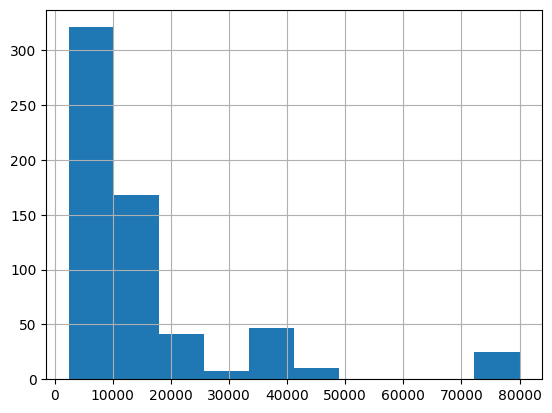

In [32]:
data_session.capacite.hist()

In [33]:
data_session.capacite.value_counts()

capacite
8000.0     212
17000.0     49
2500.0      42
13500.0     42
12860.0     40
20300.0     32
35000.0     32
9000.0      31
80000.0     25
14911.0     21
40000.0     15
6000.0      15
14000.0     13
48583.0     10
24000.0      9
32720.0      8
10056.0      8
5000.0       6
2400.0       5
15000.0      3
3000.0       2
Name: count, dtype: int64

In [34]:
data_session.capacite.isna().sum()
# probleme, on a 179 capacite qui ne sont pas mappées

0

In [35]:
# get lieux avec capacites pas mappées
data_session.loc[data_session.capacite.isna()].lieu_epreuve.value_counts()

Series([], Name: count, dtype: int64)

In [36]:
data_session.to_csv('../session_planning_with_loc_v13.csv', index=False)